In [2]:
import pandas as pd
import numpy as np
from numpy import log, dot, e
from numpy.random import rand
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

first, load the data of breast cancer , and X will be the features and y will be the labels ,then feature name for each column which represents each X

In [3]:
X = load_breast_cancer()['data']
y = load_breast_cancer()['target']
feature_names = load_breast_cancer()['feature_names'] 

In [4]:
X.shape

(569, 30)

In [5]:
#y.shape

In [6]:
#Y=y.reshape((-1,1))

In [7]:
#Y.shape

In [8]:
"""plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (16,3)
plt.barh(['Malignant','Benign'],[sum(y), len(y)-sum(y)], height=0.3)
plt.title('Class Distribution', fontSize=15)
plt.show()"""

"plt.style.use('seaborn-whitegrid')\nplt.rcParams['figure.dpi'] = 227\nplt.rcParams['figure.figsize'] = (16,3)\nplt.barh(['Malignant','Benign'],[sum(y), len(y)-sum(y)], height=0.3)\nplt.title('Class Distribution', fontSize=15)\nplt.show()"

In [9]:
"""plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (16,6)

#plt.subplot(121)
plt.plot(np.linspace(0.001, 0.999, 100), [abs(np.log(i)) for i in np.linspace(0.001, 0.999, 100)], label='If true value = 1')
plt.plot(np.linspace(0.001, 0.999, 100), [abs(np.log(1 - i)) for i in np.linspace(0.001, 0.999, 100)], label='If true value = 0')

plt.plot(0.16, 1.818352371073392, marker='.', markersize=15, c='k', label='Predicted value')
plt.plot(0.16, 0.17708679723835707, marker='.', markersize=15, c='k')

plt.axvline(0.16, c='k', alpha=0.3, ls='--', lw=1)

plt.annotate("", xy=(0.22, 2), xytext=(0.16, 2.5), arrowprops=dict(arrowstyle="->"))
plt.annotate("", xy=(0.1, 0.55), xytext=(0.16, 0.66), arrowprops=dict(arrowstyle="->"))

plt.legend(loc=(0.415,0.67), frameon=True, fontsize=14, borderpad=.6)
plt.title('Binary Cross-Entropy Loss', fontSize=17)
plt.xlabel('Predicted Value', fontSize=14)
plt.ylabel('Loss', fontSize=14)
plt.show()"""

'plt.style.use(\'seaborn-whitegrid\')\nplt.rcParams[\'figure.dpi\'] = 227\nplt.rcParams[\'figure.figsize\'] = (16,6)\n\n#plt.subplot(121)\nplt.plot(np.linspace(0.001, 0.999, 100), [abs(np.log(i)) for i in np.linspace(0.001, 0.999, 100)], label=\'If true value = 1\')\nplt.plot(np.linspace(0.001, 0.999, 100), [abs(np.log(1 - i)) for i in np.linspace(0.001, 0.999, 100)], label=\'If true value = 0\')\n\nplt.plot(0.16, 1.818352371073392, marker=\'.\', markersize=15, c=\'k\', label=\'Predicted value\')\nplt.plot(0.16, 0.17708679723835707, marker=\'.\', markersize=15, c=\'k\')\n\nplt.axvline(0.16, c=\'k\', alpha=0.3, ls=\'--\', lw=1)\n\nplt.annotate("", xy=(0.22, 2), xytext=(0.16, 2.5), arrowprops=dict(arrowstyle="->"))\nplt.annotate("", xy=(0.1, 0.55), xytext=(0.16, 0.66), arrowprops=dict(arrowstyle="->"))\n\nplt.legend(loc=(0.415,0.67), frameon=True, fontsize=14, borderpad=.6)\nplt.title(\'Binary Cross-Entropy Loss\', fontSize=17)\nplt.xlabel(\'Predicted Value\', fontSize=14)\nplt.ylabel(\'

Now, concatianate the target column into the features dataframe to have all in one table

In [18]:
pd.DataFrame(np.concatenate((X, y[:, None]), axis=1), columns=np.append(feature_names, 'Target')).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


starting in preprocessing using MinMaxScaler to transform features-> by scaling each feature to a given range
The transformation is given by: X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
                                X_scaled = X_std * (max - min) + min
then fit this to the data                                
                                

In [19]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

Now,split the data into training set and test set(33%) of our data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

first in logestic regression is the segmoid function ,cause we have a data that will not be able to separate using linear line
,so segmoid function limit the predicted output between 0 and 1.

Second calculate losses between the predicted labels and the true labels .

Third weights will be chosen randomly at each iteration ,(updating the parameters) till reaching the convergence.


after that gradient descent is  the algorithm that will collect all those functions to updata the parameters till reaching the convergence.

now the dicesion will be binary if it >0.5 it will be predicted =1 if <0.5 it will be 0

In [30]:
class LogisticRegression:
    
    def sigmoid(self, z): return 1 / (1 + e**(-z))
    
    def cost_function(self, X, y, weights):                 
        z = dot(X, weights)        
        predict_1 = y * log(self.sigmoid(z))
        predict_0 = (1 - y) * log(1 - self.sigmoid(z))        
        return -sum(predict_1 + predict_0) / len(X)
    
    def fit(self, X, y, epochs=25, lr=0.05):        
        loss = []
        weights = rand(X.shape[1])
        N = len(X)
                 
        for _ in range(epochs):        
            # Gradient Descent
            y_hat = self.sigmoid(dot(X, weights))
            weights -= lr * dot(X.T,  y_hat - y) / N            
            # Saving Progress
            loss.append(self.cost_function(X, y, weights)) 
            
        self.weights = weights
        self.loss = loss
    
    def predict(self, X):        
        # Predicting with sigmoid function
        z = dot(X, self.weights)
        # Returning binary result
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]

In [31]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train, epochs=500, lr=0.5)
y_pred = logreg.predict(X_test)

Precision means: how many are correctly classified in this case.

Recall means: how many of this class detected over the whole number of element of 
this class.

F1-score means: mean between precision and recall.


              precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.97      0.98      0.97       121

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188

-------------------------------------------------------
Confusion Matrix



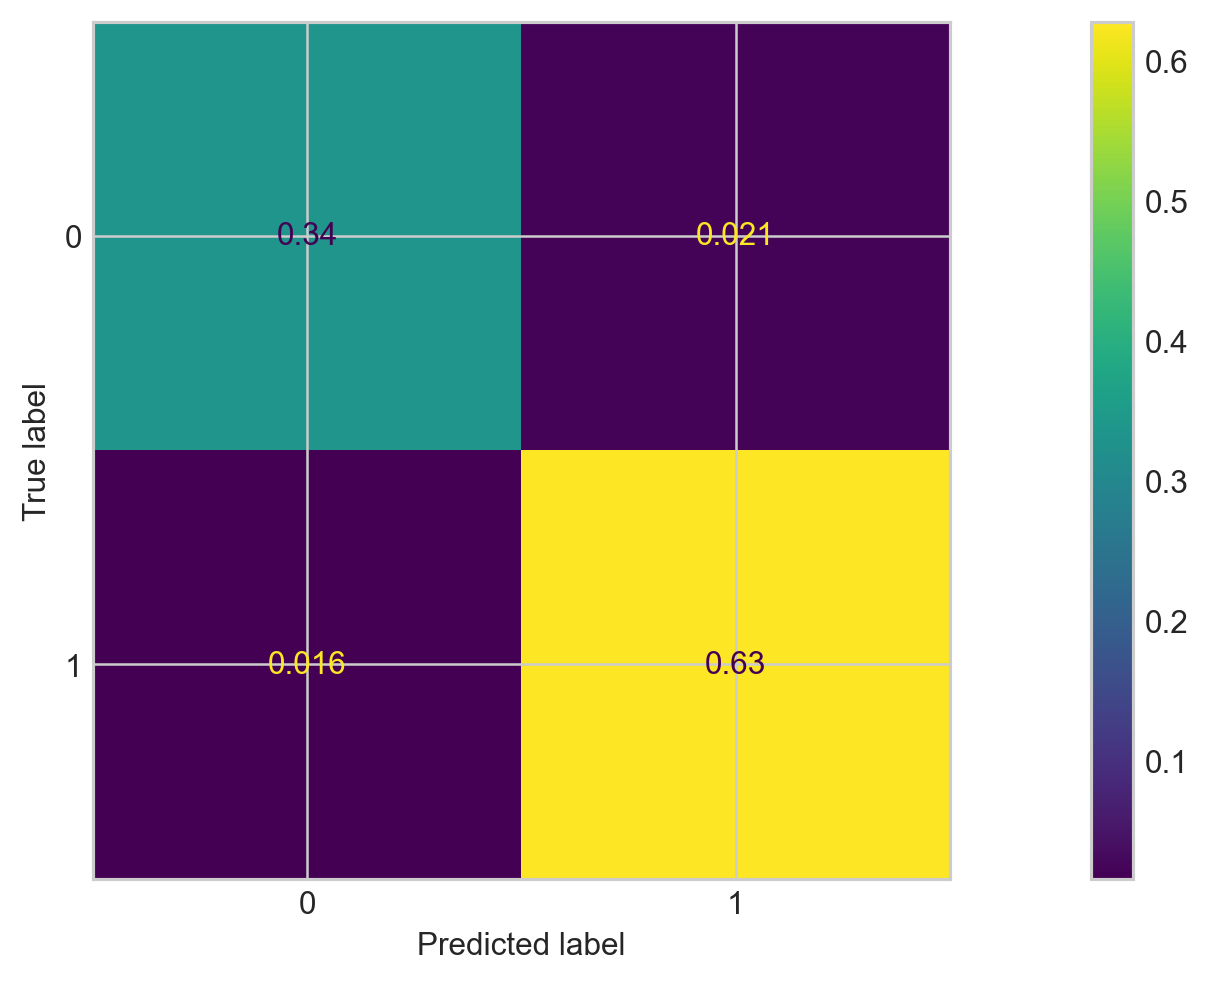

In [36]:
print(classification_report(y_test, y_pred))
print('-'*55)
print('Confusion Matrix\n')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, normalize='all')
# cmd = ConfusionMatrixDisplay(cm, display_labels=['business','health'])
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

using sicket learn for copmparing results

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
model = LogisticRegression().fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f1_score(y_test,y_pred))

0.9876543209876544


In [17]:
"""plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (16,5)
plt.plot(logreg.loss)
plt.title('Logistic Regression Training', fontSize=15)
plt.xlabel('Epochs', fontSize=12)
plt.ylabel('Loss', fontSize=12)
plt.show()"""

"plt.style.use('seaborn-whitegrid')\nplt.rcParams['figure.dpi'] = 227\nplt.rcParams['figure.figsize'] = (16,5)\nplt.plot(logreg.loss)\nplt.title('Logistic Regression Training', fontSize=15)\nplt.xlabel('Epochs', fontSize=12)\nplt.ylabel('Loss', fontSize=12)\nplt.show()"

In [ ]:
X_train, X_test, y_train, y_test